# Problem Identification
This problem is about the direct phone call marketing campaigns, which aim to promote term deposits among existing customers, by a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

# Getting the relavent Data
The data is available at UCI Repository.

### Extract Data

In [361]:
import numpy as np
import pandas as pd

In [412]:
bank_data = pd.read_csv("https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/bank-full.csv", sep=";")

# Data Analysis

In [413]:
# A look at the sample data
bank_data.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
13143,42,unemployed,divorced,secondary,no,2699,no,no,cellular,8,jul,92,2,-1,0,unknown,no
29527,52,services,married,primary,no,3016,yes,yes,cellular,3,feb,142,1,-1,0,unknown,no
12405,34,technician,divorced,secondary,no,89,yes,no,unknown,27,jun,101,5,-1,0,unknown,no
36073,35,technician,divorced,tertiary,no,4515,yes,no,cellular,11,may,66,3,173,2,failure,no
24057,34,blue-collar,divorced,secondary,no,882,no,yes,telephone,20,oct,24,1,-1,0,unknown,no
12935,38,management,married,tertiary,no,76,yes,no,cellular,7,jul,196,3,-1,0,unknown,no
11790,41,blue-collar,married,secondary,no,167,no,no,unknown,20,jun,48,1,-1,0,unknown,no
45016,40,management,married,tertiary,no,0,no,no,cellular,14,oct,1410,3,-1,0,unknown,no
22350,32,management,single,tertiary,no,98,no,no,cellular,22,aug,119,2,-1,0,unknown,no
11525,55,blue-collar,married,primary,no,5109,no,no,unknown,19,jun,55,1,-1,0,unknown,no


In [414]:
# Checking the info
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


* 45211 observations with 17 columns.
* No missing values in the data set. But 'unknown' entries in some of the columns can be considered as missing values.
* Dataset includes both numerical and categorical column.

In [415]:
# Check the descriptive measures of data
bank_data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


* **age** variable seem to be symmetrically distributed. Mean and median values are nearly equal.
* **balance** and **duration** variable seem to be asymmetrically distributed. Large difference between mean and median values. This variable contains some outliers. 

In [416]:
# identifying categorical columns and numerical columns
cat_col = bank_data.select_dtypes(include = 'object').columns
num_col = bank_data.select_dtypes(exclude = 'object').columns

In [417]:
print(cat_col)
print(num_col)

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [418]:
# One way frequency table for all categorical features
for col in cat_col:
    print('*' * 5, 'Value Counts: ', col, '*' * 5)
    print(bank_data[col].value_counts()/len(bank_data)*100,"\n")

***** Value Counts:  job *****
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: job, dtype: float64 

***** Value Counts:  marital *****
married     60.193316
single      28.289576
divorced    11.517109
Name: marital, dtype: float64 

***** Value Counts:  education *****
secondary    51.319369
tertiary     29.419831
primary      15.153392
unknown       4.107407
Name: education, dtype: float64 

***** Value Counts:  default *****
no     98.197341
yes     1.802659
Name: default, dtype: float64 

***** Value Counts:  housing *****
yes    55.583818
no     44.416182
Name: housing, dtype: float64 

***** Value Counts:  loan *****
no     83.977351
yes    16.022649
Name: loan, dtype: float64 

***** Value Counts:  con

* Only 11% of the clients subscribed the term deposits.
* 5% of the observations are with poutcome as 'other' and in addition to this there are 81% observations with 'poutcome' as unknown. So we will drop the records which have 'poutcome' as other. These can be considered as missing data and treat 'unknown' as of other category.
* There were very few success in the previous marketing campaign.
* Maximum clients were contacted on cellular phone. We can say that maximum clients were carrying cellular phone.
* Very few peole arount 16% had taken personal loans.
* 55% had housing loan.
* only 1.8% of the clients had credit in default.
* 51% had secondary education
* 60% were married.
* Maximum clients had reputed jobs with them.

In [419]:
# Numerical data
bank_data[num_col].sample(10)

,age,balance,day,duration,campaign,pdays,previous
6728,46,-619,28,96,1,-1,0
34697,41,440,5,523,1,334,2
43823,59,4007,28,581,3,63,6
5219,32,-408,23,253,2,-1,0
41553,63,2747,11,113,1,80,1
23134,35,915,26,89,3,-1,0
19977,30,2900,8,147,2,-1,0
42990,75,37127,11,505,1,-1,0
29178,39,-145,2,268,2,196,2
23434,56,1539,28,149,14,-1,0


* Some clients have negative balance in bank account. This indicates that those clients have current account and current accounts are popular among companies, firms, public enterprises, businessmen who generally have higher number of regular transactions with the bank.

In [420]:
# Looking at 3 variables; campaign, pdays and previous
bank_data[['campaign','pdays','previous']].sample(20)

,campaign,pdays,previous
30923,7,-1,0
24496,1,-1,0
25491,1,182,1
22874,4,-1,0
14938,2,-1,0
9795,2,-1,0
21423,5,-1,0
28024,2,184,2
20368,5,-1,0
5442,1,-1,0


* pdays is number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted). **But there are some entries as -1 whenever the entry is 0 for 'previous' (i.e. number of contacts performed before this campaign and for this client).**

In [421]:
# checking the skewness of numerical variables
bank_data[num_col].skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [422]:
bank_data[num_col].previous.value_counts()/len(num_bank_data)*100

0      81.736745
1       6.131251
2       4.658158
3       2.525934
4       1.579262
5       1.015240
6       0.612683
7       0.453429
8       0.285329
9       0.203490
10      0.148194
11      0.143770
12      0.097321
13      0.084050
15      0.044237
14      0.042025
17      0.033178
16      0.028754
19      0.024330
23      0.017695
20      0.017695
22      0.013271
18      0.013271
24      0.011059
27      0.011059
29      0.008847
25      0.008847
21      0.008847
30      0.006636
28      0.004424
26      0.004424
37      0.004424
38      0.004424
55      0.002212
40      0.002212
35      0.002212
58      0.002212
51      0.002212
41      0.002212
32      0.002212
275     0.002212
Name: previous, dtype: float64

* 81% of the clients were not contacted before this campaign.

## Data Cleaning

In [423]:
# Drop the observations of which have poutcome as 'other'
bank_data.drop(bank_data[bank_data.poutcome == 'other'].index, axis = 0, inplace = True)
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43371 entries, 0 to 45209
Data columns (total 17 columns):
age          43371 non-null int64
job          43371 non-null object
marital      43371 non-null object
education    43371 non-null object
default      43371 non-null object
balance      43371 non-null int64
housing      43371 non-null object
loan         43371 non-null object
contact      43371 non-null object
day          43371 non-null int64
month        43371 non-null object
duration     43371 non-null int64
campaign     43371 non-null int64
pdays        43371 non-null int64
previous     43371 non-null int64
poutcome     43371 non-null object
y            43371 non-null object
dtypes: int64(7), object(10)
memory usage: 6.0+ MB


#### Removing outliers
We can remove balance and duration outliers using z-scores. Those observations which are out of 3 z-scores left and right can be removed.

In [424]:
from scipy.stats import zscore


bank_data['balance_outliers'] = bank_data['balance']
bank_data['balance_outliers']= zscore(bank_data['balance_outliers'])

condition = (bank_data['balance_outliers']>3) | (bank_data['balance_outliers']<-3 )
bank_data.drop(bank_data[condition].index, axis = 0, inplace = True)
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42655 entries, 0 to 45209
Data columns (total 18 columns):
age                 42655 non-null int64
job                 42655 non-null object
marital             42655 non-null object
education           42655 non-null object
default             42655 non-null object
balance             42655 non-null int64
housing             42655 non-null object
loan                42655 non-null object
contact             42655 non-null object
day                 42655 non-null int64
month               42655 non-null object
duration            42655 non-null int64
campaign            42655 non-null int64
pdays               42655 non-null int64
previous            42655 non-null int64
poutcome            42655 non-null object
y                   42655 non-null object
balance_outliers    42655 non-null float64
dtypes: float64(1), int64(7), object(10)
memory usage: 6.2+ MB


In [425]:
bank_data['duration_outliers'] = bank_data['duration']
bank_data['duration_outliers']= zscore(bank_data['duration_outliers'])

condition = (bank_data['duration_outliers']>3) | (bank_data['duration_outliers']<-3 )
bank_data.drop(bank_data[condition].index, axis = 0, inplace = True)
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41753 entries, 0 to 45209
Data columns (total 19 columns):
age                  41753 non-null int64
job                  41753 non-null object
marital              41753 non-null object
education            41753 non-null object
default              41753 non-null object
balance              41753 non-null int64
housing              41753 non-null object
loan                 41753 non-null object
contact              41753 non-null object
day                  41753 non-null int64
month                41753 non-null object
duration             41753 non-null int64
campaign             41753 non-null int64
pdays                41753 non-null int64
previous             41753 non-null int64
poutcome             41753 non-null object
y                    41753 non-null object
balance_outliers     41753 non-null float64
duration_outliers    41753 non-null float64
dtypes: float64(2), int64(7), object(10)
memory usage: 6.4+ MB


In [426]:
bank_data.shape

(41753, 19)

* Some observations are removed earlier we had 45211 observations.

In [427]:
# Drop the balance_outliers column as its work is finished.
bank_data.drop(columns=['balance_outliers', 'duration_outliers'], axis = 1, inplace=True)

In [428]:
bank_data.shape

(41753, 17)

# Data Visualizations

In [429]:
import matplotlib.pyplot as plt
import seaborn as sns

(array([ 1239., 10802., 11913.,  7447.,  6591.,  3041.,   334.,   271.,
          103.,    12.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

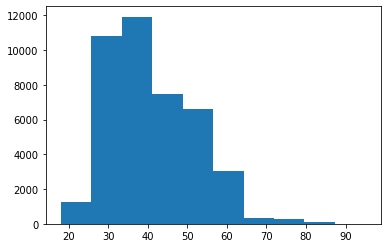

In [430]:
plt.hist(bank_data.age)

(array([1.0000e+00, 1.0000e+00, 3.1000e+01, 1.0575e+04, 2.3115e+04,
        4.4310e+03, 1.8400e+03, 9.3200e+02, 5.4400e+02, 2.8300e+02]),
 array([-6847., -5118., -3389., -1660.,    69.,  1798.,  3527.,  5256.,
         6985.,  8714., 10443.]),
 <a list of 10 Patch objects>)

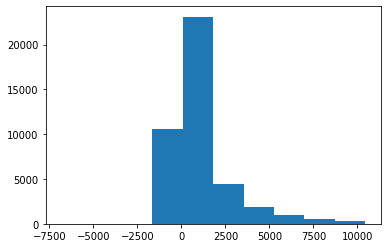

In [431]:
plt.hist(bank_data.balance)

Text(0, 0.5, 'Balance')

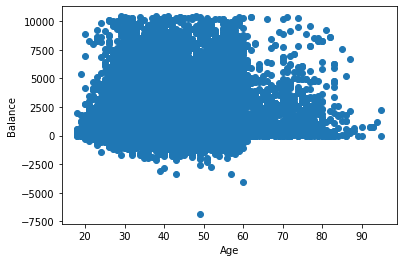

In [432]:
# Age and balance
plt.scatter(bank_data.age, bank_data.balance)
plt.xlabel("Age")
plt.ylabel('Balance')

* Based on the above scatter plot, there is not good correlation between age and balance variable.

[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

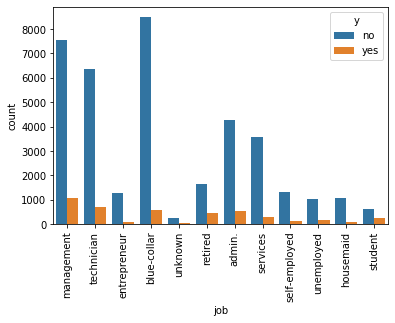

In [433]:
# Job and subscribed
plot = sns.countplot(bank_data.job, hue=bank_data.y)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

* Maximum clients from management had subscribed for the product than others.
* Frequency of clients who did not subscribed for the product was more for blue collar than others.

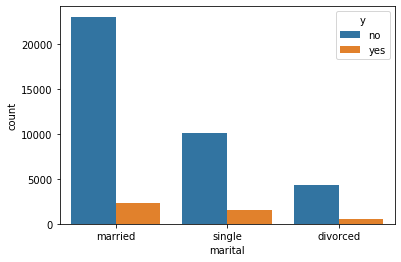

In [434]:
# Marital Status and subscribed
plot = sns.countplot(bank_data.marital, hue=bank_data.y)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

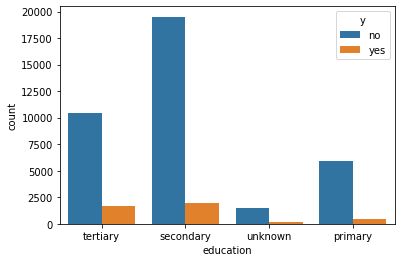

In [435]:
# Education and subscribed
plot = sns.countplot(bank_data.education, hue=bank_data.y)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

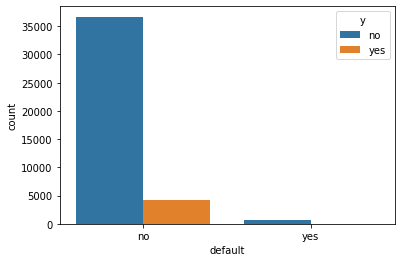

In [436]:
# default and subscribed
plot = sns.countplot(bank_data.default, hue=bank_data.y)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

* Those who had credit in default had not subscribed to the product.

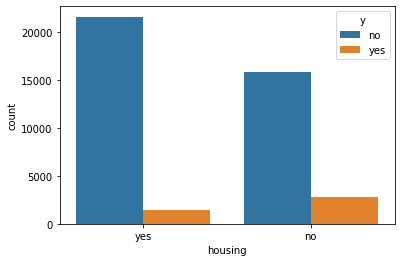

In [437]:
# Housing and subscribed
plot = sns.countplot(bank_data.housing, hue=bank_data.y)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

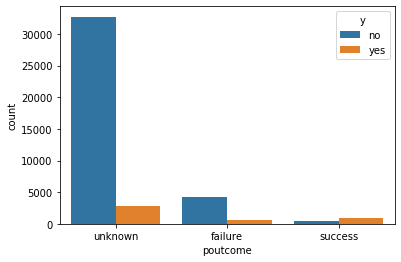

In [438]:
# poutcome and subscribed
plot = sns.countplot(bank_data.poutcome, hue=bank_data.y)
# plot.set_xticklabels(plot.get_xticklabels(), rotation=90)

* Who had no housing loan had subscribed more than those who had housing loan.
* More than 50% of the clients whose outcome of previous marketing campaign was successful had subscribed to the products.

(array([10714., 13359.,  7490.,  4065.,  2238.,  1444.,   995.,   648.,
          482.,   318.]),
 array([   0. ,  103.1,  206.2,  309.3,  412.4,  515.5,  618.6,  721.7,
         824.8,  927.9, 1031. ]),
 <a list of 10 Patch objects>)

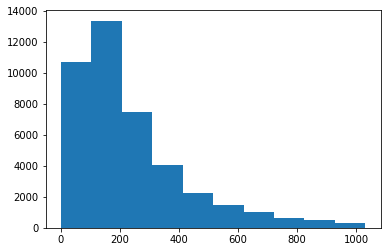

In [439]:
# duration
plt.hist(bank_data.duration)

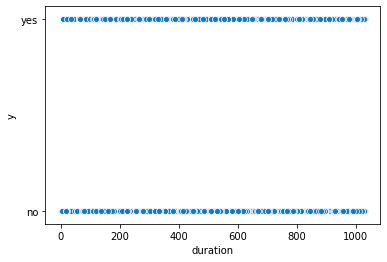

In [440]:
sns.scatterplot(bank_data.duration, bank_data.y)

In [441]:
print(bank_data.columns)
print(len(bank_data.columns))

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')
17


In [442]:
# checking correlation
bank_data.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.104847,-0.011891,-0.011344,0.005299,-0.006869,0.013848
balance,0.104847,1.000000,0.008967,0.034600,-0.021995,0.016044,0.038280
day,-0.011891,0.008967,1.000000,-0.037825,0.170057,-0.088797,-0.055280
duration,-0.011344,0.034600,-0.037825,1.000000,-0.114244,0.011721,0.014752
campaign,0.005299,-0.021995,0.170057,-0.114244,1.000000,-0.094477,-0.051630
pdays,-0.006869,0.016044,-0.088797,0.011721,-0.094477,1.000000,0.568153
previous,0.013848,0.038280,-0.055280,0.014752,-0.051630,0.568153,1.000000


## Converting Categorical Data to Numerical

In [443]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
transformed_data = oe.fit_transform(bank_data[cat_col])

In [444]:
transformed_data

array([[4., 1., 2., ..., 8., 2., 0.],
       [9., 2., 1., ..., 8., 2., 0.],
       [2., 1., 1., ..., 8., 2., 0.],
       ...,
       [9., 1., 2., ..., 9., 2., 1.],
       [5., 0., 0., ..., 9., 2., 1.],
       [1., 1., 1., ..., 9., 2., 0.]])

In [445]:
transformed_data.shape

(41753, 10)

In [456]:
bank_data.shape

(41753, 17)

In [461]:
df = pd.DataFrame(transformed_data, columns=cat_bank_data.columns)
df.shape

(41753, 10)

In [462]:
pd.concat([bank_data, df],axis=1).shape

(44692, 27)

## Checking the relationship between categorical variables

In [350]:
from sklearn.feature_selection import chi2, SelectKBest

In [351]:
chi_2, pval = chi2(df.drop(columns=['y']), df.y)

In [352]:
chi_2

array([ 180.70391103,   29.39598315,   89.75850775,   17.51814488,
        386.80575908,  178.91981264, 1251.79390408,   34.89060606,
        127.86912447])

In [353]:
feature_importances = pd.Series(chi_2, index=list(df.drop(columns=['y']).columns.values))
feature_importances.sort_values(ascending = False)

contact      1251.793904
housing       386.805759
job           180.703911
loan          178.919813
poutcome      127.869124
education      89.758508
month          34.890606
marital        29.395983
default        17.518145
dtype: float64

* Contact, housing, job, loan, poutcome, education are highly impacting the subscription.
* Let's remove month, marital and default as these features have very little impact on target.

In [398]:
# Removing the common columns of bank_data and df from bank_data
target = bank_data.y
bank_data.drop(columns=df.columns, axis = 1, inplace = True)
print(bank_data.shape, target.shape)

(41753, 7) (41753,)


In [404]:
# concatenating bank_data and df with features impacting much on the target
new_df = pd.concat([bank_data, df[['contact','housing','job','loan','poutcome','education']]], axis = 1)
print(bank_data.shape, df.shape, df[['contact','housing','job','loan','poutcome','education']].shape, target.shape, new_df.shape)

(41753, 7) (41753, 10) (41753, 6) (41753,) (44692, 13)


In [405]:
new_df.describe(include='all')

,age,balance,day,duration,campaign,pdays,previous,contact,housing,job,loan,poutcome,education
count,41753.000000,41753.000000,41753.000000,41753.000000,41753.000000,41753.000000,41753.000000,41753.000000,41753.000000,41753.000000,41753.000000,41753.000000,41753.000000
mean,40.938232,1075.461212,15.875075,233.878452,2.777190,32.355591,0.436088,0.663952,0.553421,4.337628,0.162743,1.737935,1.219050
std,10.574621,1715.805404,8.336333,190.765776,3.141922,91.033980,1.562424,0.908144,0.497144,3.280813,0.369135,0.648825,0.748994
min,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,64.000000,8.000000,102.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000
50%,39.000000,422.000000,16.000000,176.000000,2.000000,-1.000000,0.000000,0.000000,1.000000,4.000000,0.000000,2.000000,1.000000
75%,48.000000,1335.000000,21.000000,305.000000,3.000000,-1.000000,0.000000,2.000000,1.000000,7.000000,0.000000,2.000000,2.000000
max,95.000000,10443.000000,31.000000,1031.000000,63.000000,871.000000,55.000000,2.000000,1.000000,11.000000,1.000000,2.000000,3.000000


In [410]:
new_df.dropna(axis = 0, inplace = True)

In [411]:
new_df.shape

(38814, 13)

In [357]:
new_df.head(2)

,age,balance,day,duration,campaign,pdays,previous,contact,housing,job,loan,poutcome,education,y
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,2.0,1.0,4.0,0.0,2.0,2.0,no
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,2.0,1.0,9.0,0.0,2.0,1.0,no


In [358]:
# change the name of target variable from 'y' to 'subscribed' and convert the column to numerical by replacing no with 0
# and yes with 1
#new_df.rename(columns={'y': 'subscribed'}, inplace=True)
new_df['subscribed'] = new_df.y.apply(lambda x: 0 if x == 'no' else 1)
new_df.drop(columns=['y'], axis = 1, inplace = True)
new_df.head()

,age,balance,day,duration,campaign,pdays,previous,contact,housing,job,loan,poutcome,education,subscribed
0,58.0,2143.0,5.0,261.0,1.0,-1.0,0.0,2.0,1.0,4.0,0.0,2.0,2.0,0
1,44.0,29.0,5.0,151.0,1.0,-1.0,0.0,2.0,1.0,9.0,0.0,2.0,1.0,0
2,33.0,2.0,5.0,76.0,1.0,-1.0,0.0,2.0,1.0,2.0,1.0,2.0,1.0,0
3,47.0,1506.0,5.0,92.0,1.0,-1.0,0.0,2.0,1.0,1.0,0.0,2.0,3.0,0
4,33.0,1.0,5.0,198.0,1.0,-1.0,0.0,2.0,0.0,11.0,0.0,2.0,3.0,0


In [359]:
from sklearn.linear_model import LogisticRegression
lgmodel = LogisticRegression()

from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(new_df.drop(columns = ['subscribed']), new_df.subscribed)

In [360]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44692 entries, 0 to 45209
Data columns (total 14 columns):
age           41753 non-null float64
balance       41753 non-null float64
day           41753 non-null float64
duration      41753 non-null float64
campaign      41753 non-null float64
pdays         41753 non-null float64
previous      41753 non-null float64
contact       41753 non-null float64
housing       41753 non-null float64
job           41753 non-null float64
loan          41753 non-null float64
poutcome      41753 non-null float64
education     41753 non-null float64
subscribed    44692 non-null int64
dtypes: float64(13), int64(1)
memory usage: 5.1 MB


In [ ]:
lgmodel.fit(trainX, trainY)